<a href="https://colab.research.google.com/github/wakii/ML_Programming/blob/master/ex5-collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Review
- IMDB에서 positive, negative를 확인할 때의 문제점 
  - neural networks는 weight matrics를 random setting에서 시작하는데, 이는 model을 학습시키기에 data양이 절대적으로 부족하다. 
  - 언어의 특성상, sarcasm, 변형 등 표현이 너무 다양함은 그 어려움을 배가시킨다.

  - 따라서 tranfer learning을 통해 그 문제를 어느 정도 해결한다.(trick)

## Transfer Learning in NLP
  - computer vision과 같이 Pre-trained model을 이용한다.
  - Imagenet에서는, pretrained model을 만들고 fine-tuning을 하여 specifict dataset에 대한 정확도를 높인다.

  - NLP에서는, 문장의 다음 단어를 예측하는 language model라는 pretrained model을 사용한다.
  - 이전에는 nlp에서 ngram을 사용했는데, 예측할 수 있는 단어 수(정보)가 별로 없는 등 효과가 좋지 않았지만, neural net에서는 다음 단어에 대해 매우 많은 종류의 단어들을 예측할 수 있다.
  - 더 나아가, yes or no 등의 single bit 정도의 예측 뿐만 아니라, 얼마나 영어를 잘하나 등과 같은 깊은 의미까지 다룰 수 있게 되었다.
  ### Wikitext 103
  - wikitext103 dataset이라는 wikipdia의 preprocessed model을 사용한다.
  - 이를 통해 wikipedia article들에서의 다음 단어들을 예측할 수 있다. 
  - nlp에서의 좋은 model을 갖는다는 것은 실제 세계가 어떻게 돌아가는지, 무엇인지 등을 이해하는데 도움이 된다.

  - 따라서 우리는 imageNet에서 pre-trained model을 사용한 것과 같이 다음 단어를 예측할 수 있을 뿐만 아니라 언어와 그것이 무엇을 의미한느지를 이해하는 Wikitext model을 가져와 사용할 것이다.
  - 그리고 이를 활용하여 movie reviews에서 next word를 예측할 수 있는 새로운 language model을 만들 것이다.


- universal approximation theorem
- back propagation : where we take the loss function between the actual targets and the output of the final layer (i.e. the final activations), we calculate the gradients with respect to all of these yellow things, and then we update those yellow things by subtracting learning rate times the gradient. That process of calculating those gradients and then subtracting 
  - weights ﹣= weight.grad * learning rate


- fine tuning을 하는 이유 : resnet34에서 이미 fitted된 모델을 가져오는 transfer learning에서는 이미지넷의 1000개의 categories가 똑같이 셋팅되어 있다.
  - 이는 우리가 그것을 적용할 data set의 카테고리 수 와 그 값에서 일치하지 않는다.
  - 따라서 새로운 two weight matrices와 그 사이에 ReLu activation function을 만든다.
  - data.c 만큼의 col을 가진 matric를 최종 weight matrice로 사용한다.
  - 새로이 추가된 matrice는 random number이기 때문에, tuning을 해준다. 
  - 새로이 tuning 하지 않는 layer들로는 더 기본적인 더 단순한 pattern들을 판별하는 용도로 사용할 수 있다. 


- freezing layers :
  - 새로이 fitting하는 layer들이 아닌 기존의 더 단순한 layer들은 back propagation의 대상으로 삼지 않는 것
  -  freeze 함수를 이용할 시 randomly generated added layer들만 새로이 fitting하고, 그 외의 것들은 그대로 둔다.

- Unfreezing and Using Discriminative Learning Rates
  - 새롭게 추가한 layer들을 더 training 시킬 때, model을 몇개의 부분으로 나눈다. 
  - 각 부분마다 different learning rate를 적용한다. 
  - ex) 초기에는 1e-5, 나중에는 1e-3과 같이

- discriminative Learning Rates
  - early layers들에게는 작은 learning rate를 적용하여 optimal value를 찾는다.
  - 만약 너무 높은 LR을 이용할 경우, 최적점에서 너무 멀어져버린다.
  - 따라서 transfer learning에서는 이러한 설정이 매우 중요하다.
    - You can put a `single number` (e.g. 1e-3): Every layer gets the same learning rate. So you're not using discriminative learning rates.
    - You can write a `slice`. So you can write slice with a single number (e.g. slice(1e-3)): The final layers get a learning rate of whatever you wrote down (1e-3), and then all the other layers get the same learning rate which is that divided by 3. So all of the other layers will be 1e-3/3. The last layers will be 1e-3.
    - You can write slice with two numbers (e.g. slice(1e-5, 1e-3)). The final layers (these randomly added layers) will still be again 1e-3. The first layers will get 1e-5, and the other layers will get learning rates that are equally spread between those two - so multiplicatively equal. If there were three layers, there would be 1e-5, 1e-4, 1e-3, so equal multiples each time.

    - every layer가 아닌 `layer group`마다 다른 LR을 적용한다.
      - 새로 추가된 random layers들을 한 그룹
      - 나머지들을 2그룹으로 나눈다.
        - By default (at least with a CNN), you'll get three layer groups. If you say slice(1e-5, 1e-3), you will get 1e-5 learning rate for the first layer group, 1e-4 for the second, 1e-3 for the third.

- Affine Function
  - matrix multiplication과 같은 linear functions들을 affine function이라 부른다. 

- Embedding 
  - 원래는 input matrice들을 one-hot encoding을 통해 만들고 이를 matrix multiplication 한다. : array lookup
    - 하지만 이 방법은 메모리의 대부분을 0,1로 채우기 때문에 비효율적이다.
  - 따라서 이러한 matrix를 생성하지 않는 방법인 embedding을 한다. : going to pass in a bunch of integers and pretend they're one not encoded.
  - embedding은 look something up in a array를 의미한다. when you hear people say embedding, you need to replace it in your head with "an array lookup" which we know is mathematically identical to matrix multiply by a one hot encoded matrix.
  - input인 userId 값에 해당하는 weight matrix를 얻게 되는 것이다.
  - 이를 통해 각 embedding 값이 무엇을 의미하는지를 몰라도 곱해지는 해당 쌍의 값이 높으면 그 user가 그 movie(taste)를 좋아한다고 그 의미를 찾을 수 있다.  
  - these numbers represent features of personal taste and corresponding features of movies.
    -For example, the movie has John Travolta in it and user ID likes John Travolta, then you'll like this movie.


- Bias
  - John Travolta 를 좋아한다할지라도, 아무도 그가 출연한 Battlefield Earth를 좋아하지 않는다.(매우 재미 없는 영화인가봄)
  - 위와 같은 방법에서는 BE에 JT가 출연했기 때문에 추천을 해주기 마련이다.
  - 이를 조정하기 위해서 Bias가 필요하다.

  - 즉, 각 user, 각 movie가 갖고 있는 편향성(bias)를 더해주어야 한다.
    - 어떤 user는 더 후하고, 어떤 user는 깐깐하다.
    - 어떤 영화는 더 재밌고, 어떤 영화는 재미없다.


In [0]:
from fastai.collab import *
from fastai.tabular import *

## Collaborative filtering example

- collaborative filtering에는 두가지 구조가 있다.
  - userId, Movie를 2 col에 갖고 있는 형식
  - userxMovies로 갖고 있는 형식

`collab` models use data in a `DataFrame` of user, items, and ratings.

In [0]:
user,item,title = 'userId','movieId','title'

In [49]:
path = untar_data(URLs.ML_SAMPLE)
path

PosixPath('/root/.fastai/data/movie_lens_sample')

In [50]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [51]:
ratings.describe()

,userId,movieId,rating,timestamp
count,6031.000000,6031.000000,6031.000000,6.031000e+03
mean,350.269773,1892.725419,3.807826,1.127659e+09
std,194.409989,4483.290497,0.961857,1.591801e+08
min,15.000000,1.000000,0.500000,8.538928e+08
25%,176.000000,457.000000,3.000000,9.764243e+08
50%,358.000000,1089.000000,4.000000,1.111489e+09
75%,518.000000,2028.000000,4.500000,1.232810e+09
max,665.000000,58559.000000,5.000000,1.473804e+09


That's all we need to create and train a model:

In [0]:
data = CollabDataBunch.from_df(ratings, seed=42)

In [0]:
y_range = [0,5.5]

In [0]:
learn = collab_learner(data, n_factors=50, y_range=y_range)

- n_factors : architecture에게 제공
- y-range : 0점부터 5.5점까지

- cold start problem : parameter들을 맞추려고 할 때, 새로운 유저들, 새로운 영화들에 대한 데이터가 없다. 그래서 예측이 어렵다.
- 그냥 metadata driven model을 이용하는게 최선이다.
- 아님 처음에 data들을 계속 입력받아 학습을 하거나.

In [55]:
doc(collab_learner)

In [0]:
??collab_learner
??EmbeddingDotBias


- collab Learner는 EmbeddingDot  EmbeddingDotBias내의 pyTorch(nn.Module)로 값들을 처리한다.
- EmbeddingDotBias
  - n_factors, users,items, yrange등 의 값들을 tensor로 받아 저장후 
  - forward에서 pyTorch를 이용해 gradients들을 계산한다.
  - embedding 값들을 받아와 dot product들 해주고 bias term값을 넣어준다.
  - bias는 유저마다 영화마다 다른 고유의 차이들을 처리하기 위함이다.
  - layer들을 다 확장한 후에 sigmoid activation function으로 0~5.5사이의 값으로 환산한다. activation function들은 non-linearlity(한층의 layer만 가지고 있다.)
- embedding
  - nn.Module로 parameter matrix인 embedding layer들을 만든다.
  - 초기에는 random값으로 들어있다.




In [57]:
learn.fit_one_cycle(3, 5e-3)

epoch,train_loss,valid_loss,time
0,1.619828,0.949228,00:00
1,0.846910,0.673375,00:00
2,0.650929,0.666772,00:00


- image Recognition
  - pixel(1x3) 
  - weight matrix(embedding of size 5) 
  - pixel@weight matrix => 3x5 matrix
  - ReLu
  - 5x8 matrix @ => ReLu 
  - 만약 digit recognition 중이라면
  - final output을 size 10 으로 만들어낸다.
  - 그리고 loss function으로 값을 계산해 최고 높은 확률 값을 가지는 것을 return한다.
  


- parameters : weight matrix
- Activation : result of a calculatation(@ or activation function)
- 모든 calculation 들은 neuralnet의 layer들이다.

- collaborative filtering에서는 마지막 layer에 sigmoid activation function으로 처리하여 0,5 사이의 값으로 만든다. 

## Movielens 100k

Let's try with the full Movielens 100k data dataset, available from http://files.grouplens.org/datasets/movielens/ml-100k.zip

In [58]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
root_dir = '/content/drive/My Drive'
base_dir = root_dir + '/fastai-v3/lesson5'

Mounted at /content/drive


In [59]:
pwd

'/content'

In [60]:
path=Path(base_dir+'/ml-100k/')
path

PosixPath('/content/drive/My Drive/fastai-v3/lesson5/ml-100k')

In [61]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                      names=[user,item,'rating','timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [62]:
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1', header=None,
                    names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


- one hot encoding으로 각 영화들이 다양한 장르를 가지고 있는 것을 알 수 있다.

In [63]:
len(ratings)

100000

In [64]:
rating_movie = ratings.merge(movies[[item, title]])
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [0]:
data = CollabDataBunch.from_df(rating_movie, seed=42, valid_pct=0.1, item_name=title)
#rating_movie의 dataframe을 가져와, validation set 을 10%로 지정해 따로 때놓는다. 
#default로, user, item, rating 을 가정해서 받지만, 이번에는 item을 따로 title로 지정해주었다.

In [66]:
data.show_batch()

userId,title,target
58,"Rainmaker, The (1997)",4.0
562,Like Water For Chocolate (Como agua para chocolate) (1992),5.0
791,Sense and Sensibility (1995),5.0
342,One Fine Day (1996),4.0
394,"Frighteners, The (1996)",5.0


In [0]:
y_range = [0,5.5]
# final activation function 값(예측값)의 범위를 지정해준다.
# Now the problem is that a sigmoid actually asymptotes at whatever the maximum is (we said 5) which means you can never actually predict 5. But plenty of movies have a rating of 5, so that's a problem. So actually it's slightly better to make your Y range go from a little bit less than the minimum to a little bit more than the maximum. 

In [0]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

- factor의 갯수 : the width of the embedding matrix 
- collaborative filtering에서는 embedding size라는 표현보다는 factors라는 표현을 쓴다. 이는 latent factors라는 아이디어를 이용하기 때문이다. 이를 matrix factorization라고 한다.
- 40인 이유는 가장 잘 작동하는 architectural decision(경험적)


epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


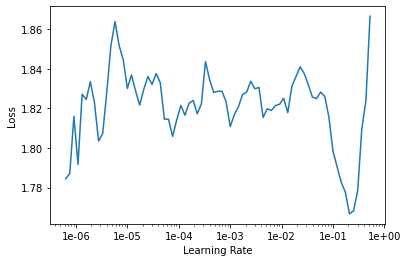

In [69]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

- lr 을 정하는 rule of thumb
  - Sylvain : find the bottm and go back by ten -> 여기서는 2e-01(bottom) 0.1배는 2e-02
  - Jeremy : 가장 steepest section -> 여기서는 2e-02

In [70]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.944782,0.954979,00:08
1,0.859772,0.881829,00:08
2,0.771115,0.834648,00:09
3,0.636313,0.811730,00:09
4,0.531139,0.812350,00:08


In [0]:
learn.save('dotprod')

Here's [some benchmarks](https://www.librec.net/release/v1.3/example.html) on the same dataset for the popular Librec system for collaborative filtering. They show best results based on RMSE of 0.91, which corresponds to an MSE of `0.91**2 = 0.83`.

## Interpretation

- anime를 좋아하는 사람들의 anime에 대한 bias를 알기
  - So how do we deal with that? Well the nice thing is that instead if we look at the movie bias, once we've included the user bias (which for an anime lover might be a very high number because they're just rating a lot of movies highly) and once we account for the specifics of this kind of movie (which again might be people love anime), what's left over is something specific to that movie itself. So it's kind of interesting to look at movie bias numbers as a way of saying what are the best movies or what do people really like as movies even if those people don't rate movies very highly or even if that movie doesn't have the kind of features that people tend to rate highly. So it's kind of nice, it's funny to say this 😆, by using the bias, we get an unbiased movie score.
  
  - bias들을 이용해, 오히려 unbiased movie score를 만든다.

### Setup

In [0]:
learn.load('dotprod');

In [73]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

In [74]:
g = rating_movie.groupby(title)['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]
#rating_movie들을 'rating'을 기준으로
#높은순서대로 sort하고, 1000개를 뽑는다.
#그 중 10개를 보자.

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

### Movie bias

In [75]:
movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.shape

#We can then take our learner that we trained and asked it for the bias of the items listed here


torch.Size([1000])

In [0]:
mean_ratings = rating_movie.groupby(title)['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

In [0]:
item0 = lambda o:o[0]
#bias로 indexing하기 위해

In [79]:
sorted(movie_ratings, key=item0)[:15]

[(tensor(-0.3431),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.3045), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2906),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2672), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2482), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2452), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2435), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2359), 'Grease 2 (1982)', 2.0),
 (tensor(-0.2344), 'Tales from the Hood (1995)', 2.037037037037037),
 (tensor(-0.2339), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.2327), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2274), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.2254), 'Showgirls (1995)', 1.9565217391304348),
 (tensor(-0.2194), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2177), 'Beautician and

In [78]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(0.6277), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5563), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5545), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5543), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.5328), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.5323), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5286), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5108), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.4965), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.4914), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.4792), 'Boot, Das (1981)', 4.203980099502488),
 (tensor(0.4779), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.4757), 'Godfather, The (1972)', 4.283292978208232),
 (tensor(0.4520), 'Apt Pupil (1998)', 4.1),
 (tensor(0.4510), 'North by Northwest (1959)', 4.284916201117318)]

### Movie weights

In [80]:
movie_w = learn.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 40])

In [81]:
movie_pca = movie_w.pca(3)
movie_pca.shape
#movie_w라는 torch tensor에 pca method를 붙인다.

torch.Size([1000, 3])

- Principal Components Analysis :  simple linear transformation that takes an input matrix and tries to find a smaller number of columns that cover a lot of the space of that original matrix.
- 40개의 factors(embedding 값들)을 핵심 3개로 추린다.

In [0]:
fac0,fac1,fac2 = movie_pca.t()
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)]

In [83]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.2983), 'Home Alone 3 (1997)'),
 (tensor(1.2686), "McHale's Navy (1997)"),
 (tensor(1.2395), 'Jungle2Jungle (1997)'),
 (tensor(1.1264), 'D3: The Mighty Ducks (1996)'),
 (tensor(1.1240), 'Leave It to Beaver (1997)'),
 (tensor(1.1215), 'Bio-Dome (1996)'),
 (tensor(1.1056), 'Children of the Corn: The Gathering (1996)'),
 (tensor(1.0839), 'Homeward Bound II: Lost in San Francisco (1996)'),
 (tensor(1.0566), 'Congo (1995)'),
 (tensor(1.0515), 'Speed 2: Cruise Control (1997)')]

In [84]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.1792), 'Wrong Trousers, The (1993)'),
 (tensor(-1.1098), 'Close Shave, A (1995)'),
 (tensor(-1.0482), 'Third Man, The (1949)'),
 (tensor(-1.0281), 'Lawrence of Arabia (1962)'),
 (tensor(-0.9832), 'Casablanca (1942)'),
 (tensor(-0.9819),
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)'),
 (tensor(-0.9813), 'Secrets & Lies (1996)'),
 (tensor(-0.9643), 'Chinatown (1974)'),
 (tensor(-0.9553), 'North by Northwest (1959)'),
 (tensor(-0.9510), 'Fargo (1996)')]

In [0]:
movie_comp = [(f, i) for f,i in zip(fac1, top_movies)]

In [86]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.2226), 'Raiders of the Lost Ark (1981)'),
 (tensor(1.1524), 'Braveheart (1995)'),
 (tensor(1.0706), 'Titanic (1997)'),
 (tensor(0.9001), 'Return of the Jedi (1983)'),
 (tensor(0.8899), "It's a Wonderful Life (1946)"),
 (tensor(0.8848), 'Hunt for Red October, The (1990)'),
 (tensor(0.8669), 'Star Wars (1977)'),
 (tensor(0.8621), 'Indiana Jones and the Last Crusade (1989)'),
 (tensor(0.8518), 'Back to the Future (1985)'),
 (tensor(0.8517), 'Independence Day (ID4) (1996)')]

In [87]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-0.8408), 'Keys to Tulsa (1997)'),
 (tensor(-0.8272), 'Trainspotting (1996)'),
 (tensor(-0.8053), 'Jude (1996)'),
 (tensor(-0.7784), 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)'),
 (tensor(-0.7700), 'Serial Mom (1994)'),
 (tensor(-0.7626), 'Dead Man (1995)'),
 (tensor(-0.7476), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(-0.7369), 'Sweet Hereafter, The (1997)'),
 (tensor(-0.7296), 'Road to Wellville, The (1994)'),
 (tensor(-0.7288), 'Boogie Nights (1997)')]

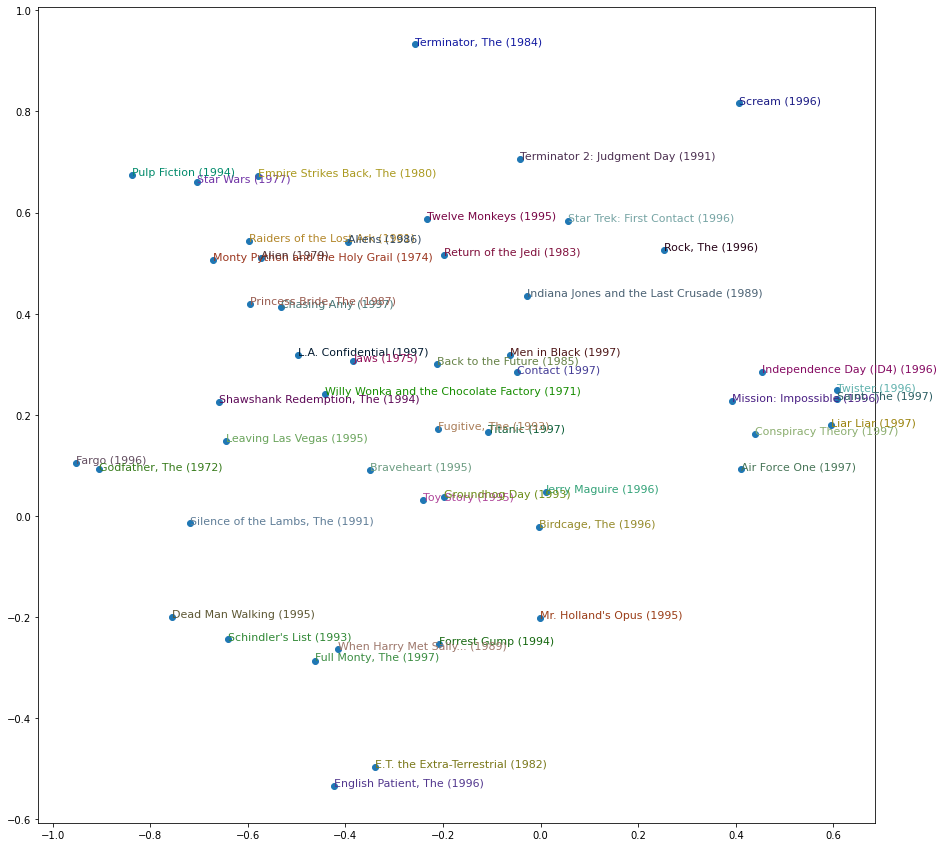

In [88]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()